Training model...
Epoch 1/20


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1135 - val_loss: 0.0565
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - val_loss: 0.0262
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0204
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0141
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - val_loss: 0.0136
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0121
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 0.0123
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - val_loss: 0.0107
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0096
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - val_loss: 0.0092
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - val_loss: 0.0090
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0085


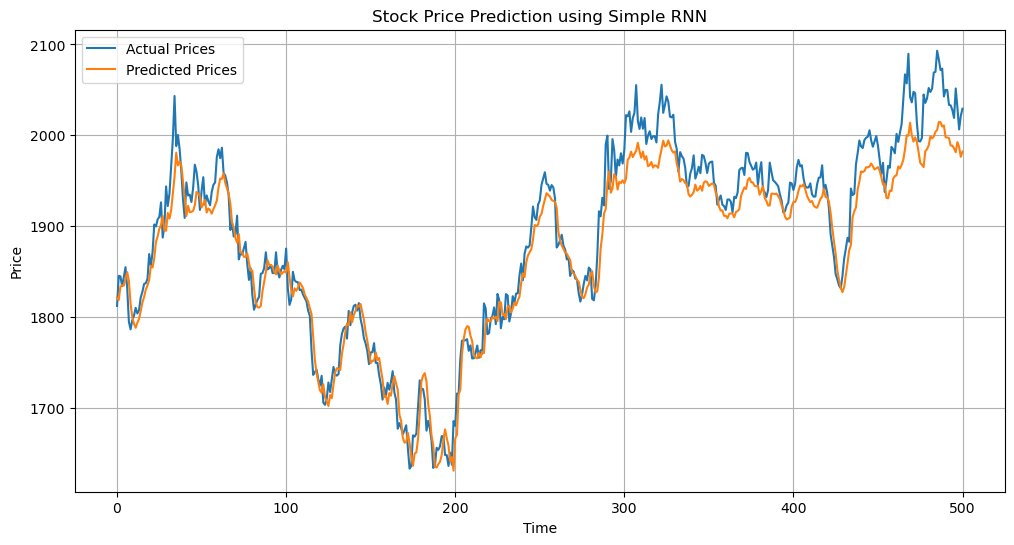

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import SGD

df = pd.read_csv("goldstock v1.csv", header=None)

df.columns = ['ID', 'Date', 'Close', 'Volume', 'Open', 'High', 'Low']

df = df.drop(index=0).reset_index(drop=True)

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date').reset_index(drop=True)

data = df[['Close']].values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

sequence_length = 10
X, y = [], []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length])
    y.append(scaled_data[i + sequence_length])

X = np.array(X)
y = np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    SimpleRNN(32, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')

print("Training model...")
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(actual, predictions)
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title("Stock Price Prediction using Simple RNN")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

In [3]:
df

,ID,Date,Open,Volume,High,Close,Low
0,NaN,Date,Close,Volume,Open,High,Low
1,0.0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
2,1.0,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
3,2.0,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
4,3.0,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
...,...,...,...,...,...,...,...
2507,2528.0,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2508,2529.0,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2509,2530.0,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2510,2531.0,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
